### tensorflow text classification from the web site

https://www.tensorflow.org/tutorials/keras/basic_text_classification

The purpose is to predict the movie review "sentiment" as either positive or negative

display what backend I am using

In [249]:
from tensorflow import keras
#import keras
import numpy as np

print('backend:',keras.backend.backend())
print('version:', keras.__version__)

backend: tensorflow
version: 2.2.4-tf


#### define the model here
I purposely put the model here because some backends ( such as plaidml ) complained about invalid config/setup
```python
vocab_size = 50000
```
the `vocab_size` determines how many vocabulary to use. The vocabulary index that is beyond this number will be shown with `<UNK>` tag


In [250]:
# input shape is the vocabulary count used for the movie reviews 
vocab_size = 50000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_length=256))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 256, 16)           800000    
_________________________________________________________________
global_average_pooling1d_11  (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 800,289
Trainable params: 800,289
Non-trainable params: 0
_________________________________________________________________


#### download the data
The data already has been "converted" from text to numbers

In [251]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)


#### show sample size and content

In [252]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Test entries: {}, labels: {}".format(len(test_data), len(test_labels)))

Training entries: 25000, labels: 25000
Test entries: 25000, labels: 25000


In [253]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### not every data (review) has the same length, so we have to "pad" the data
For this run, we are using 265 as the max length of the review.

In [254]:
len(train_data[0]), len(train_data[1])


(218, 189)

In [255]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


#### keras has the padding method

In [256]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [257]:
train_data[470]

array([    1,  2508, 13940,     6,  1718,    23,     4, 17327,    18,
           6,  6945,  1461,     5,   592,  7020,    41,  1099, 24737,
         212,     7,  7131,    39,     4,  2139,   868,   324,    34,
         592,  6960, 21521,    11,  1718,  1399,     5,  2566,    34,
           6,  7349,   177,  7581, 13930,     9,   389,    17,     4,
       11844,     2,   564, 40772,    13,   119,    14,    20,   151,
         171,   409,   306,     8,  2508,   584,   166,    12,     6,
        2286,    11,    61,   274,  2680,    61,   457,    22,     7,
        7553,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

### show how the decoded data ( number => text ) looks like

#### changed to 256 length data

In [258]:
len(train_data[0]), len(train_data[1])


(256, 256)

In [259]:
decode_review(train_data[470])

"<START> kim novak's a witch on the prowl for a mortal lover and james stewart's her choice scintillating comedy of manners from the broadway stage shot by james wong howe in witch color and performed by a sterling cast ernie kovacs is wonderful as the perpetually <UNK> writer redlitch i love this movie though few others seem to kim alone makes it a winner in my book ha my 5 film of 1958 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

#### train the model to recognize "positive" or "negative" review using word-embedding

In [260]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [261]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print('train shape', partial_x_train.shape)

train shape (15000, 256)


In [262]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val)
                    )


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.6853 - acc: 0.5921 - val_loss: 0.6668 - val_acc: 0.7581
Epoch 2/10
15000/15000 [==============================] - 1s 45us/sample - loss: 0.6088 - acc: 0.7801 - val_loss: 0.5473 - val_acc: 0.8181
Epoch 3/10
15000/15000 [==============================] - 1s 45us/sample - loss: 0.4547 - acc: 0.8593 - val_loss: 0.4148 - val_acc: 0.8545
Epoch 4/10
15000/15000 [==============================] - 1s 44us/sample - loss: 0.3309 - acc: 0.8956 - val_loss: 0.3428 - val_acc: 0.8718
Epoch 5/10
15000/15000 [==============================] - 1s 44us/sample - loss: 0.2565 - acc: 0.9166 - val_loss: 0.3073 - val_acc: 0.8805
Epoch 6/10
15000/15000 [==============================] - 1s 45us/sample - loss: 0.2071 - acc: 0.9337 - val_loss: 0.2868 - val_acc: 0.8873
Epoch 7/10
15000/15000 [==============================] - 1s 45us/sample - loss: 0.1708 - acc: 0.9467 - val_loss: 0.

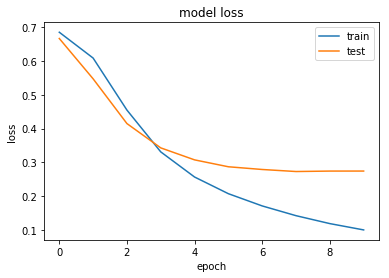

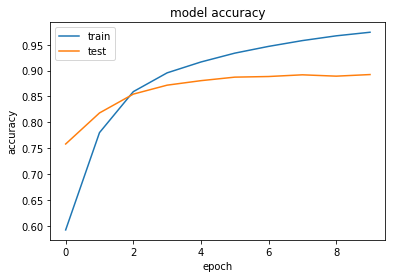

In [263]:
%matplotlib inline
from matplotlib import pyplot as plt
# show procession of training...
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### let's see how the model predicts review (positive/negative) on the unseen data

In [264]:
# evaluate againt test data
results = model.evaluate(test_data, test_labels)

print(results)



25000/25000 [==============================] - 1s 45us/sample - loss: 0.2974 - acc: 0.8784
[0.29739955898284914, 0.8784]


### Let's visualize the prediction against the "test data"

In [265]:
# create two arrays with 0 and 1
predictions = model.predict(test_data)
positive=[]
negative=[]
good_matrix = np.zeros( (2,), dtype='int')

for i in range(test_labels.shape[0]):
    guess = 1 if predictions[i][0] > 0.5 else 0
    if guess == test_labels[i]:
        good_matrix[test_labels[i]] +=1
        
    if test_labels[i] == 0:
        negative.append(predictions[i][0])
    else:
        positive.append(predictions[i][0])


### How did this simple model predict?
See the histogram to see the distribution of its predictions against positive and negative reviews.

The cutoff for positive is > 0.5

The cutoff for negative is <= 0.5

Positive Reviews: 12500 guessed correctly: 11040 88.32 %
negative Reviews: 12500 guessed correctly: 10920 87.36 %

positive median: 0.9514295


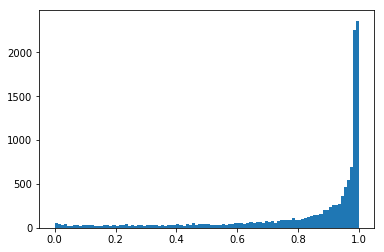

negative median: 0.033474997


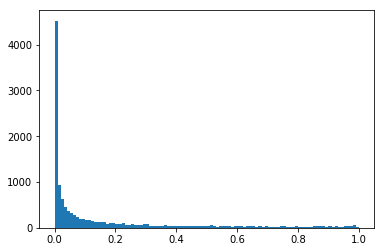

In [266]:
print('Positive Reviews:', len(positive), 'guessed correctly:',good_matrix[0], good_matrix[0]*100.0/len(positive),'%' )
print('negative Reviews:', len(negative), 'guessed correctly:',good_matrix[1], good_matrix[1]*100.0/len(negative),'%')
print()

print('positive median:', np.median(positive))
binwidth=0.01
plt.hist(positive, bins=np.arange(min(positive), max(positive) + binwidth, binwidth))
plt.show()
plt.close()

print('negative median:', np.median(negative))
binwidth=0.01
plt.hist(negative, bins=np.arange(min(negative), max(negative) + binwidth, binwidth))
plt.show()
plt.close()

#### Let's check how this simple model actually  performs against my own review.

In [267]:
from keras.preprocessing.text import text_to_word_sequence


In [268]:
# predict function
def mypredict(text):
    result = text_to_word_sequence(text)
    print(result)
    mydata = np.zeros(256,dtype='int')
    mydata[0] = 1
    index = 1
    for w in result:
        if w in word_index.keys():
            iv = word_index[w]
            if iv >= vocab_size:
                iv = 2
        else:
            iv=2
        mydata[index]=iv
        index += 1

    print(mydata)
    #decode_review(mydata)
    indata = np.reshape(mydata, (1,256))
    #print(indata.shape)
    #print(indata)
    gr = model.predict(indata)
    return gr[0][0]
    

In [269]:
mypredict("<START> this film was the worst movie I ever saw. Anyone planning to go, please spend your money else where")

['start', 'this', 'film', 'was', 'the', 'worst', 'movie', 'i', 'ever', 'saw', 'anyone', 'planning', 'to', 'go', 'please', 'spend', 'your', 'money', 'else', 'where']
[   1  380   14   22   16    4  249   20   13  126  219  259 3601    8
  140  591 1142  129  278  334  121    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    

0.11722021

#### the output is  <= 0.5 so it correctly guessed that my review was a negative review